In [1]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline
from math import cos, asin, sqrt
from numpy import meshgrid

In [2]:
import mpl_toolkits
import pandas as pd
import geopandas as geo
import csv
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import cartopy
import cartopy.crs as ccrs

from pandas import Series, DataFrame
from matplotlib.colors import LinearSegmentedColormap
from cartopy.util import add_cyclic_point
from cmocean import cm as cmo

from netCDF4 import Dataset

In [2]:
# REV 8 by Rahul Khopkar; Jupyter Notebook to clean Gravity Gradients and British Columbia Mineral Occurrence Data.
# See Dependencies in "requirements.txt" file
# Gravity Data is read from GOCE & NASA's GRACE
# Change path names to point to locations where data is stored
# Future Revisions to make Models from the data so obtained.

#This Jupyter Notebook uses Open Access Data from the following sources:
#(1) European GOCE Satellite Data
#http://eo-virtual-archive1.esa.int/products/grids_johannesb/GRIDS/225km/GO_CONS_TGG_225_KI12_20120801T000000_20131111T235959_0001.gz
#
#(2) NASA GRACE Satellite Data
#http://www2.csr.utexas.edu/grace/RL05_mascons.html
#
#(3) British Columbia Mineral Occurrences
#https://minfile.gov.bc.ca/

In [3]:
%precision 8

'%.8f'

In [4]:
pd.set_option('display.precision', 7)

In [5]:
R_Earth = 6371.0 #Radius of Earth in km

In [6]:
#g_grad_df=pd.read_csv('./data/GO_CONS_TGG_225_KI12_20120801T000000_20131111T235959_0001', encoding='latin', error_bad_lines=False, sep='\s', skiprows=28)
#g_grad_df=pd.read_csv('./data/GO_CONS_TGG_225_KI12_20120801T000000_20131111T235959_0001.csv', encoding='latin', error_bad_lines=False, sep='\s', skiprows=38, header=39)
new_names = ['Longitude','Latitude', 'g_grad_XX', 'g_grad_XY', 'g_grad_XZ', 'g_grad_YY', 'g_grad_YZ', 'g_grad_ZZ']
g_grad_df=pd.read_csv('./data/GO_CONS_TGG_225_KI12_20120801T000000_20131111T235959_0001.csv', encoding='latin', error_bad_lines=False, sep='\s+', skiprows=39, names=new_names)

#g_grad_df=pd.read_csv('./data/GO_CONS_TGG_225_KI12_20120801T000000_20131111T235959_0001', encoding='latin', error_bad_lines=False, sep='\s', header=0)

#g_grad_df=pd.read_csv('../data/', encoding='latin', error_bad_lines=False)
#g_grad_df=pandas.read_table('wind.data', header=None, sep='\s+')

In [7]:
g_grad_df.shape

(1620900, 8)

In [8]:
g_grad_df.head(5)

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ
0,-180.0,89.9,0.8949682,-0.4469789,0.2406794,2.0947732,1.0031303,-2.9897415
1,-179.8,89.9,0.8917633,-0.4428806,0.2440956,2.0978021,1.0024707,-2.9895654
2,-179.6,89.9,0.8885866,-0.4387602,0.2475100,2.1008033,1.0017998,-2.9893898
3,-179.4,89.9,0.8854383,-0.4346178,0.2509227,2.1037766,1.0011175,-2.9892149
4,-179.2,89.9,0.8823185,-0.4304538,0.2543335,2.1067220,1.0004239,-2.9890405


In [9]:
type(g_grad_df)

pandas.core.frame.DataFrame

In [10]:
####count_a_vals = df['count_a'].values
####diffs_a = count_a_vals[:-1] - count_a_vals[1:]
long_col_vals = g_grad_df['Longitude'].values
diff_long_col_vals = long_col_vals[1:] - long_col_vals[:-1] #long_col_vals[:-1] - long_col_vals[1:]
lat_col_vals = g_grad_df['Latitude'].values
diff_lat_col_vals = lat_col_vals[1:] - lat_col_vals[:-1]
##df = df.sort_values(by=['name','timestamp'])
###g_grad_df['lat_diff'] = g_grad_df.groupby('Longitude')['Latitude'].diff()
###g_grad_df['lat_diff'] = g_grad_df[g_grad_df.groupby('Longitude')['Latitude'].diff() != 0.0]
###g_grad_df['lat_diff'] = g_grad_df[g_grad_df['Latitude'].diff() != 0.0]
#g_grad_latitude_difference_df = g_grad_df[g_grad_df['Latitude'].diff()]
#g_grad_lat_df = g_grad_df.sort_values(by=['Latitude'])
#g_grad_lat_df['lat_diff'] = g_grad_lat_df[g_grad_lat_df['Latitude'].diff() != 0.0]
g_grad_XX_col_vals = g_grad_df['g_grad_XX'].values
g_grad2_dX2_col_vals = (g_grad_XX_col_vals[1:] - g_grad_XX_col_vals[:-1])/(long_col_vals[1:] - long_col_vals[:-1])
g_grad_YY_col_vals = g_grad_df['g_grad_YY'].values
#g_grad2_dY2_col_vals = (g_grad_YY_col_vals[1:] - g_grad_YY_col_vals[:-1])/(lat_col_vals[1:] - lat_col_vals[:-1])
#g_grad2_dZ2_col_vals = -(g_grad2_dX2_col_vals + g_grad2_dY2_col_vals)

In [11]:
g_grad_df.head(5)

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ
0,-180.0,89.9,0.8949682,-0.4469789,0.2406794,2.0947732,1.0031303,-2.9897415
1,-179.8,89.9,0.8917633,-0.4428806,0.2440956,2.0978021,1.0024707,-2.9895654
2,-179.6,89.9,0.8885866,-0.4387602,0.2475100,2.1008033,1.0017998,-2.9893898
3,-179.4,89.9,0.8854383,-0.4346178,0.2509227,2.1037766,1.0011175,-2.9892149
4,-179.2,89.9,0.8823185,-0.4304538,0.2543335,2.1067220,1.0004239,-2.9890405


In [12]:
g_grad2_dX2_col_vals

array([-0.01602485, -0.01588355, -0.0157415 , ...,  0.00652215,
        0.00655375,  0.00658495])

In [13]:
diff_long_col_vals

array([0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2])

In [14]:
diff_long_col_vals.shape

(1620899,)

In [15]:
g_grad_df.loc[1801]

Longitude   -180.0000000
Latitude      89.7000000
g_grad_XX      0.8533599
g_grad_XY     -0.4973716
g_grad_XZ      0.2452914
g_grad_YY      2.0375645
g_grad_YZ      0.9485326
g_grad_ZZ     -2.8909244
Name: 1801, dtype: float64

In [16]:
diff_lat_col_vals

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
g_grad_sort_lat_long_df =g_grad_df.sort_values(by=['Latitude', 'Longitude'], ascending=True)
g_grad_sort_long_lat_df =g_grad_df.sort_values(by=['Longitude', 'Latitude' ], ascending=True)

In [18]:
g_grad_sort_lat_long_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166
1619100,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556
1619101,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941
1619102,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321
1619103,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695
1619104,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064
1619105,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427
1619106,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785
1619107,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137
1619108,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483


In [19]:
####df.reindex(index=np.roll(df.index,1))
g_grad_sort_lat_long_shift_fwd_1_df = g_grad_sort_lat_long_df.reindex(index=np.roll(g_grad_sort_lat_long_df.index,1))

In [20]:
####df['vRatio'] = np.roll(df['vRatio'],1)
##########g_grad_sort_lat_long_df['Longitude'] = np.roll(g_grad_sort_lat_long_df['Longitude'],1)

In [21]:
g_grad_sort_lat_long_shift_fwd_1_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ
1800,180.0,89.9,0.8949682,-0.4469789,0.2406794,2.0947732,1.0031303,-2.9897415
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166
1619100,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556
1619101,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941
1619102,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321
1619103,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695
1619104,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064
1619105,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427
1619106,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785
1619107,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137


In [22]:
long_diff = (g_grad_sort_lat_long_df['Longitude'].values - g_grad_sort_lat_long_shift_fwd_1_df['Longitude'].values) #% 360
g_grad_XX_diff = g_grad_sort_lat_long_df['g_grad_XX'].values - g_grad_sort_lat_long_shift_fwd_1_df['g_grad_XX'].values

In [23]:
long_diff

array([-3.6e+02,  2.0e-01,  2.0e-01, ...,  2.0e-01,  2.0e-01,  2.0e-01])

In [24]:
g_grad_XX_diff

array([-1.83839273e+00,  1.32318000e-03,  1.32931000e-03, ...,
       -3.28875000e-03, -3.26098000e-03, -3.23306000e-03])

In [25]:
g_grad_sort_lat_long_df['Long_diff'] = long_diff #lat_diff.transpose()
g_grad_sort_lat_long_df['d2_g_XX'] = g_grad_XX_diff
g_grad_sort_lat_long_df['d2_g_XX_by_dX2'] = g_grad_XX_diff/long_diff

In [26]:
g_grad_sort_lat_long_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ,Long_diff,d2_g_XX,d2_g_XX_by_dX2
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,-360.0,-1.8383927,0.0051066
1619100,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,0.2,0.0013232,0.0066159
1619101,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,0.2,0.0013293,0.0066465
1619102,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,0.2,0.0013354,0.0066769
1619103,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,0.2,0.0013414,0.0067068
1619104,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,0.2,0.0013473,0.0067366
1619105,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,0.2,0.0013532,0.0067659
1619106,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,0.2,0.0013590,0.0067950
1619107,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,0.2,0.0013648,0.0068238
1619108,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,0.2,0.0013705,0.0068522


In [27]:
g_grad_sort_long_lat_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166
1617298,-180.0,-89.7,-1.0082011,-0.1720315,-0.4525207,-0.7072836,-0.4873176,1.7154848
1615497,-180.0,-89.5,-1.0822352,-0.1459545,-0.4661384,-0.7432599,-0.4505187,1.8254950
1613696,-180.0,-89.3,-1.1642246,-0.1147961,-0.4681404,-0.7821926,-0.4155201,1.9464171
1611895,-180.0,-89.1,-1.2523277,-0.0781356,-0.4565782,-0.8236871,-0.3832058,2.0760148
1610094,-180.0,-88.9,-1.3443153,-0.0355897,-0.4300699,-0.8673019,-0.3547223,2.2116172
1608293,-180.0,-88.7,-1.4378242,0.0130927,-0.3878996,-0.9125805,-0.3315091,2.3504047
1606492,-180.0,-88.5,-1.5306255,0.0679114,-0.3299507,-0.9590842,-0.3152865,2.4897097
1604691,-180.0,-88.3,-1.6208094,0.1284854,-0.2564942,-1.0064024,-0.3079789,2.6272118
1602890,-180.0,-88.1,-1.7068235,0.1939442,-0.1679203,-1.0541226,-0.3115649,2.7609461


In [28]:
####df.reindex(index=np.roll(df.index,1))
g_grad_sort_long_lat_shift_fwd_1_df= g_grad_sort_long_lat_df.reindex(index=np.roll(g_grad_sort_long_lat_df.index,1))

In [29]:
g_grad_sort_long_lat_shift_fwd_1_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ
1800,180.0,89.9,0.8949682,-0.4469789,0.2406794,2.0947732,1.0031303,-2.9897415
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166
1617298,-180.0,-89.7,-1.0082011,-0.1720315,-0.4525207,-0.7072836,-0.4873176,1.7154848
1615497,-180.0,-89.5,-1.0822352,-0.1459545,-0.4661384,-0.7432599,-0.4505187,1.8254950
1613696,-180.0,-89.3,-1.1642246,-0.1147961,-0.4681404,-0.7821926,-0.4155201,1.9464171
1611895,-180.0,-89.1,-1.2523277,-0.0781356,-0.4565782,-0.8236871,-0.3832058,2.0760148
1610094,-180.0,-88.9,-1.3443153,-0.0355897,-0.4300699,-0.8673019,-0.3547223,2.2116172
1608293,-180.0,-88.7,-1.4378242,0.0130927,-0.3878996,-0.9125805,-0.3315091,2.3504047
1606492,-180.0,-88.5,-1.5306255,0.0679114,-0.3299507,-0.9590842,-0.3152865,2.4897097
1604691,-180.0,-88.3,-1.6208094,0.1284854,-0.2564942,-1.0064024,-0.3079789,2.6272118


In [30]:
lat_diff = (g_grad_sort_long_lat_df['Latitude'].values - g_grad_sort_long_lat_shift_fwd_1_df['Latitude'].values) % 360
g_grad_YY_diff = g_grad_sort_long_lat_df['g_grad_YY'].values - g_grad_sort_long_lat_shift_fwd_1_df['g_grad_YY'].values

In [31]:
g_grad_sort_long_lat_df['Lat_diff'] = lat_diff #lat_diff.transpose()
g_grad_sort_long_lat_df['d2_g_YY'] = g_grad_YY_diff
g_grad_sort_long_lat_df['d2_g_YY_by_dY2'] = g_grad_YY_diff/lat_diff

In [32]:
g_grad_sort_long_lat_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ,Lat_diff,d2_g_YY,d2_g_YY_by_dY2
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,180.2,-2.7693653,-0.0153683
1617298,-180.0,-89.7,-1.0082011,-0.1720315,-0.4525207,-0.7072836,-0.4873176,1.7154848,0.2,-0.0326916,-0.1634578
1615497,-180.0,-89.5,-1.0822352,-0.1459545,-0.4661384,-0.7432599,-0.4505187,1.8254950,0.2,-0.0359762,-0.1798810
1613696,-180.0,-89.3,-1.1642246,-0.1147961,-0.4681404,-0.7821926,-0.4155201,1.9464171,0.2,-0.0389327,-0.1946636
1611895,-180.0,-89.1,-1.2523277,-0.0781356,-0.4565782,-0.8236871,-0.3832058,2.0760148,0.2,-0.0414946,-0.2074728
1610094,-180.0,-88.9,-1.3443153,-0.0355897,-0.4300699,-0.8673019,-0.3547223,2.2116172,0.2,-0.0436147,-0.2180737
1608293,-180.0,-88.7,-1.4378242,0.0130927,-0.3878996,-0.9125805,-0.3315091,2.3504047,0.2,-0.0452786,-0.2263931
1606492,-180.0,-88.5,-1.5306255,0.0679114,-0.3299507,-0.9590842,-0.3152865,2.4897097,0.2,-0.0465037,-0.2325187
1604691,-180.0,-88.3,-1.6208094,0.1284854,-0.2564942,-1.0064024,-0.3079789,2.6272118,0.2,-0.0473182,-0.2365908
1602890,-180.0,-88.1,-1.7068235,0.1939442,-0.1679203,-1.0541226,-0.3115649,2.7609461,0.2,-0.0477202,-0.2386010


In [33]:
g_grad_sort_lat_long_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ,Long_diff,d2_g_XX,d2_g_XX_by_dX2
1619099,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,-360.0,-1.8383927,0.0051066
1619100,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,0.2,0.0013232,0.0066159
1619101,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,0.2,0.0013293,0.0066465
1619102,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,0.2,0.0013354,0.0066769
1619103,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,0.2,0.0013414,0.0067068
1619104,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,0.2,0.0013473,0.0067366
1619105,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,0.2,0.0013532,0.0067659
1619106,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,0.2,0.0013590,0.0067950
1619107,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,0.2,0.0013648,0.0068238
1619108,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,0.2,0.0013705,0.0068522


In [34]:
####df1.join(df2)
#d2g_by_dx2_and_d2g_by_dy2_df = g_grad_sort_lat_long_df.join(g_grad_sort_long_lat_df, on='index')
#d2g_by_dx2_and_d2g_by_dy2_df = g_grad_sort_lat_long_df.join(g_grad_sort_long_lat_df, left_on=['Longitude', 'Latitude'], right_on=['Longitude', 'Latitude'])
#####d2g_by_dx2_and_d2g_by_dy2_df = pd.merge(g_grad_sort_lat_long_df, g_grad_sort_long_lat_df, left_on=['Longitude', 'Latitude'], right_on=['Longitude', 'Latitude'])
d2g_by_dx2_and_d2g_by_dy2_df = pd.merge(g_grad_sort_lat_long_df, g_grad_sort_long_lat_df, left_on=['Longitude', 'Latitude'], right_on=['Longitude', 'Latitude'], how='outer')

In [35]:
d2g_by_dx2_and_d2g_by_dy2_df

,Longitude,Latitude,g_grad_XX_x,g_grad_XY_x,g_grad_XZ_x,g_grad_YY_x,g_grad_YZ_x,g_grad_ZZ_x,Long_diff,d2_g_XX,d2_g_XX_by_dX2,g_grad_XX_y,g_grad_XY_y,g_grad_XZ_y,g_grad_YY_y,g_grad_YZ_y,g_grad_ZZ_y,Lat_diff,d2_g_YY,d2_g_YY_by_dY2
0,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,-360.0,-1.8383927,0.0051066,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,180.2,-2.7693653,-0.0153683
1,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,0.2,0.0013232,0.0066159,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,180.2,-2.7707275,-0.0153758
2,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,0.2,0.0013293,0.0066465,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,180.2,-2.7751242,-0.0154002
3,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,0.2,0.0013354,0.0066769,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,180.2,-2.7794988,-0.0154245
4,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,0.2,0.0013414,0.0067068,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,180.2,-2.7838509,-0.0154487
5,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,0.2,0.0013473,0.0067366,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,180.2,-2.7881805,-0.0154727
6,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,0.2,0.0013532,0.0067659,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,180.2,-2.7924872,-0.0154966
7,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,0.2,0.0013590,0.0067950,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,180.2,-2.7967708,-0.0155204
8,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,0.2,0.0013648,0.0068238,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,180.2,-2.8010312,-0.0155440
9,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,0.2,0.0013705,0.0068522,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,180.2,-2.8052681,-0.0155675


In [36]:
d2g_by_dx2_and_d2g_by_dy2_df.shape

(1620900, 20)

In [37]:
####m = pd.merge(dfA, dfB, right_index = True, left_on='value')
###d2g_by_dx2_and_d2g_by_dy2_df = pd.merge(g_grad_sort_lat_long_df, g_grad_sort_long_lat_df) # left_on=['Longitude', 'Latitude'], right_on=['Longitude', 'Latitude'])
#####d2g_by_dx2_and_d2g_by_dy2_outer_df = pd.merge(g_grad_sort_lat_long_df, g_grad_sort_long_lat_df, left_on=['Longitude', 'Latitude'], right_on=['Longitude', 'Latitude'], how='outer')

In [38]:
####df1.join(df2, how='outer')
#d2g_by_dx2_and_d2g_by_dy2_df = g_grad_sort_lat_long_df.join(g_grad_sort_long_lat_df, on='index', how='outer')

In [39]:
#####d2g_by_dx2_and_d2g_by_dy2_outer_df

In [40]:
######d2g_by_dx2_and_d2g_by_dy2_outer_df.shape

In [41]:
d2g_by_dx2_and_d2g_by_dy2_df['d2_g_ZZ_by_dZ2'] = -(d2g_by_dx2_and_d2g_by_dy2_df['d2_g_XX_by_dX2'].values + d2g_by_dx2_and_d2g_by_dy2_df['d2_g_YY_by_dY2'].values )

In [42]:
d2g_by_dx2_and_d2g_by_dy2_df

,Longitude,Latitude,g_grad_XX_x,g_grad_XY_x,g_grad_XZ_x,g_grad_YY_x,g_grad_YZ_x,g_grad_ZZ_x,Long_diff,d2_g_XX,...,g_grad_XX_y,g_grad_XY_y,g_grad_XZ_y,g_grad_YY_y,g_grad_YZ_y,g_grad_ZZ_y,Lat_diff,d2_g_YY,d2_g_YY_by_dY2,d2_g_ZZ_by_dZ2
0,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,-360.0,-1.8383927,...,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,180.2,-2.7693653,-0.0153683,0.0102616
1,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,0.2,0.0013232,...,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,180.2,-2.7707275,-0.0153758,0.0087599
2,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,0.2,0.0013293,...,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,180.2,-2.7751242,-0.0154002,0.0087537
3,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,0.2,0.0013354,...,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,180.2,-2.7794988,-0.0154245,0.0087477
4,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,0.2,0.0013414,...,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,180.2,-2.7838509,-0.0154487,0.0087418
5,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,0.2,0.0013473,...,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,180.2,-2.7881805,-0.0154727,0.0087361
6,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,0.2,0.0013532,...,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,180.2,-2.7924872,-0.0154966,0.0087306
7,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,0.2,0.0013590,...,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,180.2,-2.7967708,-0.0155204,0.0087253
8,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,0.2,0.0013648,...,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,180.2,-2.8010312,-0.0155440,0.0087203
9,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,0.2,0.0013705,...,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,180.2,-2.8052681,-0.0155675,0.0087153


In [43]:
####pd.merge(df_new, df_n, on='subject_id')
#d2g_by_dx2_and_d2g_by_dy2_df = pd.merge(g_grad_sort_lat_long_df, g_grad_sort_long_lat_df, on='index' )
d2g_by_dx2_and_d2g_by_dy2_mrg_default_df = pd.merge(g_grad_sort_lat_long_df, g_grad_sort_long_lat_df)

In [44]:
d2g_by_dx2_and_d2g_by_dy2_df.shape

(1620900, 21)

In [45]:
####df = df.loc[:, ~df.columns.duplicated()]
d2g_by_dx2_and_d2g_by_dy2_df_drop_dupl_cols = d2g_by_dx2_and_d2g_by_dy2_df.loc[:, ~d2g_by_dx2_and_d2g_by_dy2_df.columns.duplicated()]

In [46]:
d2g_by_dx2_and_d2g_by_dy2_df_drop_dupl_cols

,Longitude,Latitude,g_grad_XX_x,g_grad_XY_x,g_grad_XZ_x,g_grad_YY_x,g_grad_YZ_x,g_grad_ZZ_x,Long_diff,d2_g_XX,...,g_grad_XX_y,g_grad_XY_y,g_grad_XZ_y,g_grad_YY_y,g_grad_YZ_y,g_grad_ZZ_y,Lat_diff,d2_g_YY,d2_g_YY_by_dY2,d2_g_ZZ_by_dZ2
0,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,-360.0,-1.8383927,...,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,180.2,-2.7693653,-0.0153683,0.0102616
1,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,0.2,0.0013232,...,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,180.2,-2.7707275,-0.0153758,0.0087599
2,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,0.2,0.0013293,...,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,180.2,-2.7751242,-0.0154002,0.0087537
3,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,0.2,0.0013354,...,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,180.2,-2.7794988,-0.0154245,0.0087477
4,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,0.2,0.0013414,...,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,180.2,-2.7838509,-0.0154487,0.0087418
5,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,0.2,0.0013473,...,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,180.2,-2.7881805,-0.0154727,0.0087361
6,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,0.2,0.0013532,...,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,180.2,-2.7924872,-0.0154966,0.0087306
7,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,0.2,0.0013590,...,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,180.2,-2.7967708,-0.0155204,0.0087253
8,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,0.2,0.0013648,...,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,180.2,-2.8010312,-0.0155440,0.0087203
9,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,0.2,0.0013705,...,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,180.2,-2.8052681,-0.0155675,0.0087153


In [47]:
d2g_by_dx2_and_d2g_by_dy2_df_drop_dupl_cols.shape

(1620900, 21)

In [48]:
d2g_by_dx2_and_d2g_by_dy2_df_drop_dupl_cols.columns

Index(['Longitude', 'Latitude', 'g_grad_XX_x', 'g_grad_XY_x', 'g_grad_XZ_x',
       'g_grad_YY_x', 'g_grad_YZ_x', 'g_grad_ZZ_x', 'Long_diff', 'd2_g_XX',
       'd2_g_XX_by_dX2', 'g_grad_XX_y', 'g_grad_XY_y', 'g_grad_XZ_y',
       'g_grad_YY_y', 'g_grad_YZ_y', 'g_grad_ZZ_y', 'Lat_diff', 'd2_g_YY',
       'd2_g_YY_by_dY2', 'd2_g_ZZ_by_dZ2'],
      dtype='object')

In [49]:
####_, i = np.unique(df.columns, return_index=True)
#### df.iloc[:, i]
_, i = np.unique(d2g_by_dx2_and_d2g_by_dy2_mrg_default_df.columns, return_index=True)
d2g_by_dx2_and_d2g_by_dy2_df.iloc[:, i]

,g_grad_XX_y,Latitude,Long_diff,Longitude,d2_g_XX,d2_g_XX_by_dX2,g_grad_XY_y,g_grad_XZ_y,g_grad_XX_x,g_grad_XY_x,g_grad_XZ_x,g_grad_YY_x,g_grad_YZ_x,g_grad_ZZ_x
0,-0.9434245,-89.9,-360.0,-180.0,-1.8383927,0.0051066,-0.1934163,-0.4295908,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166
1,-0.9421013,-89.9,0.2,-179.8,0.0013232,0.0066159,-0.1942987,-0.4278214,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556
2,-0.9407720,-89.9,0.2,-179.6,0.0013293,0.0066465,-0.1951719,-0.4260464,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941
3,-0.9394366,-89.9,0.2,-179.4,0.0013354,0.0066769,-0.1960359,-0.4242657,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321
4,-0.9380953,-89.9,0.2,-179.2,0.0013414,0.0067068,-0.1968905,-0.4224795,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695
5,-0.9367479,-89.9,0.2,-179.0,0.0013473,0.0067366,-0.1977359,-0.4206878,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064
6,-0.9353948,-89.9,0.2,-178.8,0.0013532,0.0067659,-0.1985719,-0.4188904,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427
7,-0.9340357,-89.9,0.2,-178.6,0.0013590,0.0067950,-0.1993985,-0.4170876,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785
8,-0.9326710,-89.9,0.2,-178.4,0.0013648,0.0068238,-0.2002156,-0.4152792,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137
9,-0.9313005,-89.9,0.2,-178.2,0.0013705,0.0068522,-0.2010233,-0.4134653,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483


In [50]:
d2g_by_dx2_and_d2g_by_dy2_df.shape

(1620900, 21)

In [51]:
d2g_by_dx2_and_d2g_by_dy2_mrg_default_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ,Long_diff,d2_g_XX,d2_g_XX_by_dX2,Lat_diff,d2_g_YY,d2_g_YY_by_dY2
0,-180.0,-89.9,-0.9434245,-0.1934163,-0.4295908,-0.6745921,-0.5252438,1.6180166,-360.0,-1.8383927,0.0051066,180.2,-2.7693653,-0.0153683
1,-179.8,-89.9,-0.9421013,-0.1942987,-0.4278214,-0.6759543,-0.5267723,1.6180556,0.2,0.0013232,0.0066159,180.2,-2.7707275,-0.0153758
2,-179.6,-89.9,-0.9407720,-0.1951719,-0.4260464,-0.6773221,-0.5282950,1.6180941,0.2,0.0013293,0.0066465,180.2,-2.7751242,-0.0154002
3,-179.4,-89.9,-0.9394366,-0.1960359,-0.4242657,-0.6786955,-0.5298119,1.6181321,0.2,0.0013354,0.0066769,180.2,-2.7794988,-0.0154245
4,-179.2,-89.9,-0.9380953,-0.1968905,-0.4224795,-0.6800743,-0.5313231,1.6181695,0.2,0.0013414,0.0067068,180.2,-2.7838509,-0.0154487
5,-179.0,-89.9,-0.9367479,-0.1977359,-0.4206878,-0.6814585,-0.5328285,1.6182064,0.2,0.0013473,0.0067366,180.2,-2.7881805,-0.0154727
6,-178.8,-89.9,-0.9353948,-0.1985719,-0.4188904,-0.6828480,-0.5343281,1.6182427,0.2,0.0013532,0.0067659,180.2,-2.7924872,-0.0154966
7,-178.6,-89.9,-0.9340357,-0.1993985,-0.4170876,-0.6842427,-0.5358219,1.6182785,0.2,0.0013590,0.0067950,180.2,-2.7967708,-0.0155204
8,-178.4,-89.9,-0.9326710,-0.2002156,-0.4152792,-0.6856427,-0.5373098,1.6183137,0.2,0.0013648,0.0068238,180.2,-2.8010312,-0.0155440
9,-178.2,-89.9,-0.9313005,-0.2010233,-0.4134653,-0.6870478,-0.5387919,1.6183483,0.2,0.0013705,0.0068522,180.2,-2.8052681,-0.0155675


In [52]:
d2g_by_dx2_and_d2g_by_dy2_mrg_default_df.shape

(1620900, 14)

In [53]:
#British Columbia Extents (long_min, lat_min, long_max, lat_max)       | -139.06 | 48.30 | -114.03 | 60.00
# df = min_occ_df[min_occ_df['LATITUDE']==min_occ_df['LATITUDE'].max()]

In [54]:
BC_long_min = -139.06
BC_lat_min = 48.30
BC_long_max = -114.03
BC_lat_max = 60.00

In [55]:
long_extent = BC_long_max - BC_long_min

In [56]:
long_extent

25.03000000

In [57]:
lat_extent = BC_lat_max - BC_lat_min

In [58]:
lat_extent

11.70000000

In [59]:
g_grad_df['Longitude'].head(5)

0   -180.0
1   -179.8
2   -179.6
3   -179.4
4   -179.2
Name: Longitude, dtype: float64

In [60]:
type(BC_long_min)

float

In [61]:
type(g_grad_df['Longitude'])

pandas.core.series.Series

In [62]:
BC_lim_condition = (d2g_by_dx2_and_d2g_by_dy2_df['Longitude'] >= BC_long_min) & (d2g_by_dx2_and_d2g_by_dy2_df['Longitude'] <= BC_long_max) & (d2g_by_dx2_and_d2g_by_dy2_df['Latitude'] >= BC_lat_min) & (d2g_by_dx2_and_d2g_by_dy2_df['Latitude'] <= BC_lat_max)

In [63]:
BC_d2gzz_by_dz2_df = d2g_by_dx2_and_d2g_by_dy2_df[BC_lim_condition]

In [64]:
BC_d2gzz_by_dz2_df

,Longitude,Latitude,g_grad_XX_x,g_grad_XY_x,g_grad_XZ_x,g_grad_YY_x,g_grad_YZ_x,g_grad_ZZ_x,Long_diff,d2_g_XX,...,g_grad_XX_y,g_grad_XY_y,g_grad_XZ_y,g_grad_YY_y,g_grad_YZ_y,g_grad_ZZ_y,Lat_diff,d2_g_YY,d2_g_YY_by_dY2,d2_g_ZZ_by_dZ2
1244696,-139.0,48.3,1.1290802,-0.1675973,-1.1984340,1.3287442,1.1337688,-2.4578244,0.2,-0.0059358,...,1.1290802,-0.1675973,-1.1984340,1.3287442,1.1337688,-2.4578244,0.2,0.0036383,0.0181915,0.0114875
1244697,-138.8,48.3,1.1233760,-0.1725005,-1.1990031,1.3443720,1.1486504,-2.4677480,0.2,-0.0057042,...,1.1233760,-0.1725005,-1.1990031,1.3443720,1.1486504,-2.4677480,0.2,0.0038827,0.0194135,0.0091075
1244698,-138.6,48.3,1.1178894,-0.1774997,-1.1999151,1.3609662,1.1653360,-2.4788556,0.2,-0.0054866,...,1.1178894,-0.1774997,-1.1999151,1.3609662,1.1653360,-2.4788556,0.2,0.0041294,0.0206470,0.0067860
1244699,-138.4,48.3,1.1125972,-0.1825809,-1.2012265,1.3782981,1.1841187,-2.4908953,0.2,-0.0052922,...,1.1125972,-0.1825809,-1.2012265,1.3782981,1.1841187,-2.4908953,0.2,0.0043546,0.0217730,0.0046880
1244700,-138.2,48.3,1.1074675,-0.1877148,-1.2029946,1.3960757,1.2052219,-2.5035432,0.2,-0.0051297,...,1.1074675,-0.1877148,-1.2029946,1.3960757,1.2052219,-2.5035432,0.2,0.0045314,0.0226570,0.0029915
1244701,-138.0,48.3,1.1024633,-0.1928565,-1.2052706,1.4139708,1.2287865,-2.5164340,0.2,-0.0050042,...,1.1024633,-0.1928565,-1.2052706,1.4139708,1.2287865,-2.5164340,0.2,0.0046335,0.0231675,0.0018535
1244702,-137.8,48.3,1.0975438,-0.1979479,-1.2080929,1.4316479,1.2548701,-2.5291917,0.2,-0.0049195,...,1.0975438,-0.1979479,-1.2080929,1.4316479,1.2548701,-2.5291917,0.2,0.0046402,0.0232010,0.0013965
1244703,-137.6,48.3,1.0926678,-0.2029221,-1.2114814,1.4487872,1.2834578,-2.5414550,0.2,-0.0048760,...,1.0926678,-0.2029221,-1.2114814,1.4487872,1.2834578,-2.5414550,0.2,0.0045392,0.0226960,0.0016840
1244704,-137.4,48.3,1.0877953,-0.2077094,-1.2154361,1.4650994,1.3144786,-2.5528947,0.2,-0.0048725,...,1.0877953,-0.2077094,-1.2154361,1.4650994,1.3144786,-2.5528947,0.2,0.0043280,0.0216400,0.0027225
1244705,-137.2,48.3,1.0828896,-0.2122433,-1.2199369,1.4803315,1.3478250,-2.5632211,0.2,-0.0049057,...,1.0828896,-0.2122433,-1.2199369,1.4803315,1.3478250,-2.5632211,0.2,0.0040129,0.0200645,0.0044640


In [65]:
BC_d2gzz_by_dz2_df.shape

(7375, 21)

In [66]:
BC_lim_condition_mrg_default = (d2g_by_dx2_and_d2g_by_dy2_mrg_default_df['Longitude'] >= BC_long_min) & (d2g_by_dx2_and_d2g_by_dy2_mrg_default_df['Longitude'] <= BC_long_max) & (d2g_by_dx2_and_d2g_by_dy2_mrg_default_df['Latitude'] >= BC_lat_min) & (d2g_by_dx2_and_d2g_by_dy2_mrg_default_df['Latitude'] <= BC_lat_max)

In [67]:
BC_d2gzz_by_dz2_mrg_default_df = d2g_by_dx2_and_d2g_by_dy2_mrg_default_df[BC_lim_condition_mrg_default]

In [68]:
BC_d2gzz_by_dz2_mrg_default_df

,Longitude,Latitude,g_grad_XX,g_grad_XY,g_grad_XZ,g_grad_YY,g_grad_YZ,g_grad_ZZ,Long_diff,d2_g_XX,d2_g_XX_by_dX2,Lat_diff,d2_g_YY,d2_g_YY_by_dY2
1244696,-139.0,48.3,1.1290802,-0.1675973,-1.1984340,1.3287442,1.1337688,-2.4578244,0.2,-0.0059358,-0.0296790,0.2,0.0036383,0.0181915
1244697,-138.8,48.3,1.1233760,-0.1725005,-1.1990031,1.3443720,1.1486504,-2.4677480,0.2,-0.0057042,-0.0285210,0.2,0.0038827,0.0194135
1244698,-138.6,48.3,1.1178894,-0.1774997,-1.1999151,1.3609662,1.1653360,-2.4788556,0.2,-0.0054866,-0.0274330,0.2,0.0041294,0.0206470
1244699,-138.4,48.3,1.1125972,-0.1825809,-1.2012265,1.3782981,1.1841187,-2.4908953,0.2,-0.0052922,-0.0264610,0.2,0.0043546,0.0217730
1244700,-138.2,48.3,1.1074675,-0.1877148,-1.2029946,1.3960757,1.2052219,-2.5035432,0.2,-0.0051297,-0.0256485,0.2,0.0045314,0.0226570
1244701,-138.0,48.3,1.1024633,-0.1928565,-1.2052706,1.4139708,1.2287865,-2.5164340,0.2,-0.0050042,-0.0250210,0.2,0.0046335,0.0231675
1244702,-137.8,48.3,1.0975438,-0.1979479,-1.2080929,1.4316479,1.2548701,-2.5291917,0.2,-0.0049195,-0.0245975,0.2,0.0046402,0.0232010
1244703,-137.6,48.3,1.0926678,-0.2029221,-1.2114814,1.4487872,1.2834578,-2.5414550,0.2,-0.0048760,-0.0243800,0.2,0.0045392,0.0226960
1244704,-137.4,48.3,1.0877953,-0.2077094,-1.2154361,1.4650994,1.3144786,-2.5528947,0.2,-0.0048725,-0.0243625,0.2,0.0043280,0.0216400
1244705,-137.2,48.3,1.0828896,-0.2122433,-1.2199369,1.4803315,1.3478250,-2.5632211,0.2,-0.0049057,-0.0245285,0.2,0.0040129,0.0200645


In [69]:
BC_d2gzz_by_dz2_mrg_default_df.shape

(7375, 14)

In [70]:

#OLD# BC_g_grad = g_grad_df[(g_grad_df['Longitude'] >= BC_long_min) & (g_grad_df['Longitude'] <= BC_long_max) & (g_grad_df['Latitude'] >= BC_lat_min) & (g_grad_df['Latitude'] <= BC_lat_max)]

In [71]:
#OLD# BC_g_grad.shape

In [72]:
#OLD# BC_g_grad.head(5)

In [73]:
#OLD# long_lat_g_grad_XX_df = BC_g_grad.loc[:,['Longitude', 'Latitude', 'g_grad_XX']]
long_lat_dg2_by_dz2_df = BC_d2gzz_by_dz2_df.loc[:, ['Longitude', 'Latitude', 'd2_g_ZZ_by_dZ2'] ]

In [74]:
#OLD# long_lat_g_grad_XX_df.head(5)
long_lat_dg2_by_dz2_df

,Longitude,Latitude,d2_g_ZZ_by_dZ2
1244696,-139.0,48.3,0.0114875
1244697,-138.8,48.3,0.0091075
1244698,-138.6,48.3,0.0067860
1244699,-138.4,48.3,0.0046880
1244700,-138.2,48.3,0.0029915
1244701,-138.0,48.3,0.0018535
1244702,-137.8,48.3,0.0013965
1244703,-137.6,48.3,0.0016840
1244704,-137.4,48.3,0.0027225
1244705,-137.2,48.3,0.0044640


In [75]:
#OLD# g_grad_XX_max = BC_g_grad['g_grad_XX'].max()
#OLD# g_grad_XX_min = BC_g_grad['g_grad_XX'].min()
d2g_by_dz2_max = long_lat_dg2_by_dz2_df['d2_g_ZZ_by_dZ2'].max()
d2g_by_dz2_min = long_lat_dg2_by_dz2_df['d2_g_ZZ_by_dZ2'].min()

In [76]:
#OLD# g_grad_XX_max
d2g_by_dz2_max

0.80783759

In [77]:
#OLD# g_grad_XX_min
d2g_by_dz2_min

-0.49215560

In [78]:
#OLD# Y = BC_g_grad['Latitude'].unique() #BC_g_grad['Longitude'].values
Y = long_lat_dg2_by_dz2_df['Latitude'].unique()

In [79]:
#OLD# Y.shape
Y.shape

(59,)

In [80]:
#OLD# lat_min = Y.min()
#OLD# lat_max = Y.max()
lat_min = Y.min()
lat_max = Y.max()

In [81]:
#OLD# lat_min
lat_min

48.30000000

In [82]:
#OLD# lat_max
lat_max

59.90000000

In [83]:
#OLD# unique_lat_value_num = Y.shape[0] ###BC_g_grad['Latitude'].unique().shape[0]
unique_lat_value_num = Y.shape[0]

In [84]:
#OLD# unique_lat_value_num
unique_lat_value_num

59

In [85]:
lat_increments = lat_extent/unique_lat_value_num #lat_extent/g_grad_incr_steps

In [86]:
lat_increments

0.19830508

In [87]:
#OLD# X = BC_g_grad['Longitude'].unique()
X = long_lat_dg2_by_dz2_df['Longitude'].unique()

In [88]:
X.shape

(125,)

In [89]:
long_min = X.min()
long_max = X.max()

In [90]:
long_min

-139.00000000

In [91]:
long_max

-114.20000000

In [92]:
#OLD# g_grad_incr_steps = BC_g_grad.shape[0] #1000
dg2_by_dz2_incr_steps = long_lat_dg2_by_dz2_df.shape[0]

In [93]:
#OLD# g_grad_increments = (g_grad_XX_max - g_grad_XX_min)/g_grad_incr_steps
dg2_by_dz2_increments = (d2g_by_dz2_max - d2g_by_dz2_min)/dg2_by_dz2_incr_steps

In [94]:
#OLD# g_grad_increments
dg2_by_dz2_increments

0.00017627

In [95]:
#X = BC_g_grad['Longitude'].unique()

In [96]:
unique_long_value_num = X.shape[0] ###BC_g_grad['Longitude'].unique().shape[0]

In [97]:
unique_long_value_num

125

In [98]:
long_increments = long_extent/unique_long_value_num #long_extent/g_grad_incr_steps

In [99]:
long_increments

0.20024000

In [100]:
unique_long_value_num*unique_lat_value_num

7375

In [101]:
#OLD# g_grad_XX_contour_levels = np.arange(g_grad_XX_min, g_grad_XX_max, g_grad_increments)
d2g_by_dz2_contour_levels = np.arange(d2g_by_dz2_min, d2g_by_dz2_max, dg2_by_dz2_increments)

In [102]:
#OLD# contour_levels = BC_g_grad['g_grad_XX'].values
contour_levels = long_lat_dg2_by_dz2_df['d2_g_ZZ_by_dZ2'].values

In [103]:
print( "Contour levels: %s" %contour_levels)

Contour levels: [ 0.0114875   0.0091075   0.006786   ... -0.15911177 -0.15375241
 -0.1476238 ]


In [104]:
#OLD# g_grad_XX_only = BC_g_grad['g_grad_XX'].values # BC_g_grad.loc[:, ['Longitude','Latitude','g_grad_XX'] ] #BC_g_grad['g_grad_XX'].values
d2_g_ZZ_by_dZ2_only = long_lat_dg2_by_dz2_df['d2_g_ZZ_by_dZ2'].values

In [105]:
d2_g_ZZ_by_dZ2_only #g_grad_XX_only.head(5).T

array([ 0.0114875 ,  0.0091075 ,  0.006786  , ..., -0.15911177,
       -0.15375241, -0.1476238 ])

In [106]:
xx, yy = np.meshgrid(X, Y)

In [107]:
#OLD# g_grad_XX_only_array = g_grad_XX_only.reshape(unique_lat_value_num, unique_long_value_num) #(unique_long_value_num,unique_lat_value_num)
d2_g_ZZ_by_dZ2_only_reshaped = d2_g_ZZ_by_dZ2_only.reshape(unique_lat_value_num, unique_long_value_num)

In [108]:
#OLD# g_grad_XX_only_array
d2_g_ZZ_by_dZ2_only_reshaped

array([[ 0.0114875 ,  0.0091075 ,  0.006786  , ..., -0.02985486,
        -0.05391494, -0.08030968],
       [ 0.005075  ,  0.002769  ,  0.000669  , ..., -0.05028293,
        -0.07753192, -0.10714995],
       [-0.0018675 , -0.0038955 , -0.0055565 , ..., -0.07318705,
        -0.10362097, -0.13617301],
       ...,
       [ 0.5174462 ,  0.4829391 ,  0.44649075, ..., -0.15745046,
        -0.15556939, -0.15301663],
       [ 0.43422805,  0.3954013 ,  0.35520158, ..., -0.1600204 ,
        -0.15629729, -0.15183301],
       [ 0.34388535,  0.30177836,  0.25899996, ..., -0.15911177,
        -0.15375241, -0.1476238 ]])

In [109]:
#OLD# g_grad_XX_only_array.shape #topo = np.zeros(shape=(BC_g_grad.shape[0],BC_g_grad.shape[0]))
d2_g_ZZ_by_dZ2_only_reshaped.shape

(59, 125)

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


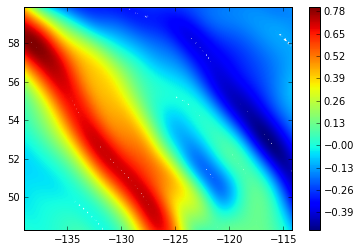

In [110]:
#OLD# ###plt.contour(X,Y, g_grad_XX_only_array, g_grad_XX_contour_levels)
#OLD# ###plt.colorbar()
plt.contour(X,Y, d2_g_ZZ_by_dZ2_only_reshaped, d2g_by_dz2_contour_levels)
plt.colorbar()

In [111]:
min_occ_df=pd.read_csv('../data/Mineral_Occurence.20180905/Cu_Au_Ag_Sn_Pd_Pt_Os_Ir_Zn_201809041545__MineralOccurrenceData.csv', encoding='latin', error_bad_lines=False) 
prod_df=pd.read_csv('../data/Combined.201809041545/Cu_Au_Ag_Sn_Pd_Pt_Os_Ir_Zn_201809041545__ProductionData.csv', encoding='latin', error_bad_lines=False) 

b'Skipping line 109: expected 57 fields, saw 58\nSkipping line 328: expected 57 fields, saw 59\nSkipping line 659: expected 57 fields, saw 58\nSkipping line 682: expected 57 fields, saw 59\nSkipping line 691: expected 57 fields, saw 58\nSkipping line 694: expected 57 fields, saw 58\nSkipping line 738: expected 57 fields, saw 58\n'
b'Skipping line 67: expected 18 fields, saw 19\nSkipping line 286: expected 18 fields, saw 19\n'


In [112]:
min_occ_df.shape

(1350, 57)

In [113]:
min_occ_df.head(5)

,MINFILNO,NAME1,NAME2,STATUS_C,STATUS_D,LATITUDE,LAT_DEG,LAT_MIN,LAT_SEC,LAT_HEMI,...,NTSMAP_C1,NTSMAP_C2,PRODUCTN,RESERVES,REGION_C1,REGION_D1,REGION_C2,REGION_D2,URL,Unnamed: 56
0,082ENE003\t,UNION \t,UNION (L.1022S) \t,PAPR \t,Past Producer \t,49.558611,49,33,31,N \t,...,082E09W \t,\t,Y \t,N \t,BC \t,British Columbia \t,\t,\t,http://minfile.gov.bc.ca/Summary.aspx?minfilno...,NaN
1,082ENE017\t,WATERLOO \t,WATERLOO NO.3 (L.4815) \t,PAPR \t,Past Producer \t,49.900833,49,54,3,N \t,...,082E15E \t,\t,Y \t,N \t,BC \t,British Columbia \t,\t,\t,http://minfile.gov.bc.ca/Summary.aspx?minfilno...,NaN
2,082ENE027\t,AU \t,PEAK 40 \t,PAPR \t,Past Producer \t,49.903611,49,54,13,N \t,...,082E15E \t,\t,N \t,N \t,BC \t,British Columbia \t,\t,\t,http://minfile.gov.bc.ca/Summary.aspx?minfilno...,NaN
3,082ENE031\t,LUMPY \t,LUMPY LOC. 14 \t,SHOW \t,Showing \t,49.886666,49,53,12,N \t,...,082E15E \t,\t,N \t,Y \t,BC \t,British Columbia \t,\t,\t,http://minfile.gov.bc.ca/Summary.aspx?minfilno...,NaN
4,082ENE032\t,RAMPALO \t,RAMPALO L. 2408 \t,PROS \t,Prospect \t,49.893055,49,53,35,N \t,...,082E15E \t,\t,N \t,N \t,BC \t,British Columbia \t,\t,\t,http://minfile.gov.bc.ca/Summary.aspx?minfilno...,NaN


In [114]:
prod_df.shape

(400, 18)

In [115]:
prod_df.head(5)

,MINFILNO,NAME,MINED,MILLED,Gold,Silver,Copper,Lead,Zinc,Commod_1,Quantity1,Commod_2,Quantity2,Commod_3,Quantity3,FirstYear,LastYear,Unnamed: 17
0,082ENE003\t,UNION \t,122555,213586 \t,1727012 \t,43305752 \t,12665 \t,168527 \t,298664 \t,\t,\t,\t,\t,\t,\t,1913,1989,NaN
1,082ENE017\t,WATERLOO \t,982,1011 \t,2644 \t,1723791 \t,5 \t,22128 \t,41060 \t,Cadmium \t,123 \t,\t,\t,\t,\t,1918,1983,NaN
2,082ENE035\t,LIGHTNING PEAK \t,139,0 \t,93 \t,434943 \t,\t,35961 \t,3362 \t,\t,\t,\t,\t,\t,\t,1904,1936,NaN
3,082ENW018\t,SILVER KING \t,244,0 \t,1618 \t,15116 \t,\t,\t,\t,\t,\t,\t,\t,\t,\t,1939,1941,NaN
4,082ESE001\t,PROVIDENCE (L.618) \t,10426,48 \t,183384 \t,42551891 \t,29 \t,182657 \t,117973 \t,\t,\t,\t,\t,\t,\t,1893,1973,NaN


In [116]:
prod_after_given_year_df= prod_df[prod_df['FirstYear']>1999]

In [117]:
prod_after_given_year_df.shape

(3, 18)

In [118]:
num_of_rows_prod_data = prod_after_given_year_df.shape[1]

In [119]:
prod_after_given_year_df.head(num_of_rows_prod_data)

,MINFILNO,NAME,MINED,MILLED,Gold,Silver,Copper,Lead,Zinc,Commod_1,Quantity1,Commod_2,Quantity2,Commod_3,Quantity3,FirstYear,LastYear,Unnamed: 17
329,093N 194\t,MOUNT MILLIGAN \t,68092000,30498000 \t,12926466 \t,\t,66382300 \t,\t,\t,\t,\t,\t,\t,\t,\t,2013,2015,NaN
374,103P 251\t,CLONE \t,124,124 \t,14805 \t,\t,\t,\t,\t,\t,\t,\t,\t,\t,\t,2010,2011,NaN
395,104N 043\t,YELLOW JACKET \t,2142,2142 \t,17593 \t,\t,\t,\t,\t,\t,\t,\t,\t,\t,\t,2007,2007,NaN


In [120]:
latitude_max_extent=min_occ_df[min_occ_df['LATITUDE']==min_occ_df['LATITUDE'].max()]

In [121]:
latitude_min_extent=min_occ_df[min_occ_df['LATITUDE']==min_occ_df['LATITUDE'].min()]

In [122]:
longitude_max_extent=min_occ_df[min_occ_df['LONGITUDE']==min_occ_df['LONGITUDE'].max()]

In [123]:
longitude_min_extent=min_occ_df[min_occ_df['LONGITUDE']==min_occ_df['LONGITUDE'].min()]

In [124]:
longitude_of_latitude_max_extent=latitude_max_extent['LONGITUDE'].values

In [125]:
prod_minrl_occ_df = pd.merge(min_occ_df,prod_df,on='MINFILNO')

In [126]:
prod_minrl_occ_df.columns

Index(['MINFILNO', 'NAME1', 'NAME2', 'STATUS_C', 'STATUS_D', 'LATITUDE',
       'LAT_DEG', 'LAT_MIN', 'LAT_SEC', 'LAT_HEMI', 'LONGITUDE', 'LON_DEG',
       'LON_MIN', 'LON_SEC', 'LON_HEMI', 'UTM_ZONE', 'UTM_NORT', 'UTM_EAST',
       'ELEV', 'COMMOD_C1', 'COMMOD_C2', 'COMMOD_C3', 'COMMOD_C4', 'COMMOD_C5',
       'COMMOD_C6', 'COMMOD_C7', 'COMMOD_C8', 'COMMOD_D1', 'COMMOD_D2',
       'COMMOD_D3', 'COMMOD_D4', 'COMMOD_D5', 'COMMOD_D6', 'COMMOD_D7',
       'COMMOD_D8', 'DEPTYP_C1', 'DEPTYP_C2', 'DEPTYPE_D1', 'DEPTYPE_D2',
       'DEPCLA_C1', 'DEPCLA_C2', 'DEPCLA_D1', 'DEPCLA_D2', 'TECBLT_C',
       'TECBLT_D', 'TERRAN_C', 'TERRAN_D', 'NTSMAP_C1', 'NTSMAP_C2',
       'PRODUCTN', 'RESERVES', 'REGION_C1', 'REGION_D1', 'REGION_C2',
       'REGION_D2', 'URL', 'Unnamed: 56', 'NAME', 'MINED', 'MILLED', 'Gold',
       'Silver', 'Copper', 'Lead', 'Zinc', 'Commod_1', 'Quantity1', 'Commod_2',
       'Quantity2', 'Commod_3', 'Quantity3', 'FirstYear', 'LastYear',
       'Unnamed: 17'],
      dtype='obj

In [127]:
prod_minrl_occ_df.head(5)

,MINFILNO,NAME1,NAME2,STATUS_C,STATUS_D,LATITUDE,LAT_DEG,LAT_MIN,LAT_SEC,LAT_HEMI,...,Zinc,Commod_1,Quantity1,Commod_2,Quantity2,Commod_3,Quantity3,FirstYear,LastYear,Unnamed: 17
0,082ENE003\t,UNION \t,UNION (L.1022S) \t,PAPR \t,Past Producer \t,49.558611,49,33,31,N \t,...,298664 \t,\t,\t,\t,\t,\t,\t,1913,1989,NaN
1,082ENE017\t,WATERLOO \t,WATERLOO NO.3 (L.4815) \t,PAPR \t,Past Producer \t,49.900833,49,54,3,N \t,...,41060 \t,Cadmium \t,123 \t,\t,\t,\t,\t,1918,1983,NaN
2,082ENE035\t,LIGHTNING PEAK \t,THUNDER HILL (L.3413) \t,PAPR \t,Past Producer \t,49.884444,49,53,4,N \t,...,3362 \t,\t,\t,\t,\t,\t,\t,1904,1936,NaN
3,082ENW018\t,SILVER KING \t,RAT 1 \t,PAPR \t,Past Producer \t,49.796944,49,47,49,N \t,...,\t,\t,\t,\t,\t,\t,\t,1939,1941,NaN
4,082ESE001\t,PROVIDENCE (L.618) \t,\t,PAPR \t,Past Producer \t,49.111666,49,6,42,N \t,...,117973 \t,\t,\t,\t,\t,\t,\t,1893,1973,NaN


In [128]:
prod_after_given_year_df= prod_df[prod_df['FirstYear']>1999]

In [129]:
prod_after_given_year_df.shape

(3, 18)

In [130]:
num_of_rows_prod_data = prod_after_given_year_df.shape[1]

In [131]:
prod_after_given_year_df.head(num_of_rows_prod_data).T

,329,374,395
MINFILNO,093N 194\t,103P 251\t,104N 043\t
NAME,MOUNT MILLIGAN \t,CLONE \t,YELLOW JACKET \t
MINED,68092000,124,2142
MILLED,30498000 \t,124 \t,2142 \t
Gold,12926466 \t,14805 \t,17593 \t
Silver,\t,\t,\t
Copper,66382300 \t,\t,\t
Lead,\t,\t,\t
Zinc,\t,\t,\t
Commod_1,\t,\t,\t


In [132]:
latitude_max_extent=min_occ_df[min_occ_df['LATITUDE']==min_occ_df['LATITUDE'].max()]

In [133]:
latitude_min_extent=min_occ_df[min_occ_df['LATITUDE']==min_occ_df['LATITUDE'].min()]

In [134]:
longitude_max_extent=min_occ_df[min_occ_df['LONGITUDE']==min_occ_df['LONGITUDE'].max()]

In [135]:
longitude_min_extent=min_occ_df[min_occ_df['LONGITUDE']==min_occ_df['LONGITUDE'].min()]

In [136]:
latitude_max_extent['LONGITUDE']

1347   -137.08361
Name: LONGITUDE, dtype: float64

In [137]:
longitude_of_latitude_max_extent=latitude_max_extent['LONGITUDE'].values

In [138]:
latitude_min_extent['LONGITUDE']

396   -123.68611
Name: LONGITUDE, dtype: float64

In [139]:
latitude_max_extent_combin=prod_minrl_occ_df[prod_minrl_occ_df['LATITUDE']==prod_minrl_occ_df['LATITUDE'].max()]
latitude_min_extent_combin=prod_minrl_occ_df[prod_minrl_occ_df['LATITUDE']==prod_minrl_occ_df['LATITUDE'].min()]
longitude_max_extent_combin=prod_minrl_occ_df[prod_minrl_occ_df['LONGITUDE']==prod_minrl_occ_df['LONGITUDE'].max()]
longitude_min_extent_combin=prod_minrl_occ_df[prod_minrl_occ_df['LONGITUDE']==prod_minrl_occ_df['LONGITUDE'].min()]

In [140]:
prod_minrl_occ_df['Silver'].head(20)

0     43305752                      \t
1     1723791                       \t
2     434943                        \t
3     15116                         \t
4     42551891                      \t
5     456530                        \t
6     88426                         \t
7     14463                         \t
8     17033147                      \t
9     183035743                     \t
10    4949950                       \t
11    156                           \t
12    17635                         \t
13    851893                        \t
14    186681                        \t
15    42642                         \t
16    52906                         \t
17    8054963                       \t
18    81613                         \t
19    2052                          \t
Name: Silver, dtype: object

In [141]:
longitude_min_extent_combin['LONGITUDE'].values

array([-134.23499])

In [142]:
latitude_min_extent_combin['LATITUDE'].values

array([48.346388])

In [143]:
longitude_max_extent_combin['LONGITUDE'].values

array([-115.50388])

In [144]:
latitude_max_extent_combin['LATITUDE'].values

array([59.696666])

In [145]:
lat_mean=(0.5*latitude_min_extent_combin['LATITUDE'].values+0.5*latitude_max_extent_combin['LATITUDE'].values)[0]

In [146]:
lat_mean

54.02152700

In [147]:
long_mean=(0.5*(longitude_min_extent_combin['LONGITUDE'].values + longitude_max_extent_combin['LONGITUDE']).values)[0]

In [148]:
long_mean

-124.86943500

In [149]:
lons = prod_minrl_occ_df['LONGITUDE'].values
lats = prod_minrl_occ_df['LATITUDE'].values
Au_prod_string = prod_minrl_occ_df['Gold']
#Au_prod_string_comp_df = prod_minrl_occ_df.loc[:,]
Au_prod_string_no_tabs = prod_minrl_occ_df['Gold'].replace("\s+"," ", regex=True)
Au_prod_string_no_tabs = Au_prod_string_no_tabs.replace('', 0.0)

In [150]:
prod_mirl_occ_df_Ag_zero=[]
prod_mirl_occ_df_Ag_zero.append(prod_minrl_occ_df['Gold'][prod_minrl_occ_df['Gold'] == ''])
pd.to_numeric(prod_minrl_occ_df['Gold'], errors='ignore')

s = prod_minrl_occ_df['Gold']
Au_prod_numeric_df=pd.to_numeric(s, errors='coerce')

In [151]:
Au_prod_numeric_df #Au_prod_string

0        1727012.0
1           2644.0
2             93.0
3           1618.0
4         183384.0
5           5193.0
6          18102.0
7          16981.0
8         112721.0
9       28340619.0
10       1283993.0
11            31.0
12         15210.0
13         18550.0
14        157195.0
15             NaN
16          7869.0
17       1348459.0
18          8927.0
19            12.0
20           249.0
21             NaN
22          5020.0
23           435.0
24            31.0
25          8056.0
26           653.0
27         14308.0
28          1244.0
29          4790.0
          ...     
370         8300.0
371          466.0
372           31.0
373            NaN
374        14805.0
375          591.0
376          312.0
377            7.0
378    101654828.0
379        31694.0
380      2984054.0
381          875.0
382            NaN
383          308.0
384          654.0
385      1815918.0
386     62206610.0
387        81911.0
388          249.0
389      2815393.0
390      2931644.0
391     1504

In [152]:
###prod_minrl_occ_Au_prod_numeric_df['Au_Prod'] = Au_prod_numeric_df
prod_minrl_occ_df['Au_Prod'] = Au_prod_numeric_df

In [153]:
###prod_minrl_occ_Au_prod_numeric_df.head(5)
prod_minrl_occ_df.head(5)

,MINFILNO,NAME1,NAME2,STATUS_C,STATUS_D,LATITUDE,LAT_DEG,LAT_MIN,LAT_SEC,LAT_HEMI,...,Commod_1,Quantity1,Commod_2,Quantity2,Commod_3,Quantity3,FirstYear,LastYear,Unnamed: 17,Au_Prod
0,082ENE003\t,UNION \t,UNION (L.1022S) \t,PAPR \t,Past Producer \t,49.558611,49,33,31,N \t,...,\t,\t,\t,\t,\t,\t,1913,1989,NaN,1727012.0
1,082ENE017\t,WATERLOO \t,WATERLOO NO.3 (L.4815) \t,PAPR \t,Past Producer \t,49.900833,49,54,3,N \t,...,Cadmium \t,123 \t,\t,\t,\t,\t,1918,1983,NaN,2644.0
2,082ENE035\t,LIGHTNING PEAK \t,THUNDER HILL (L.3413) \t,PAPR \t,Past Producer \t,49.884444,49,53,4,N \t,...,\t,\t,\t,\t,\t,\t,1904,1936,NaN,93.0
3,082ENW018\t,SILVER KING \t,RAT 1 \t,PAPR \t,Past Producer \t,49.796944,49,47,49,N \t,...,\t,\t,\t,\t,\t,\t,1939,1941,NaN,1618.0
4,082ESE001\t,PROVIDENCE (L.618) \t,\t,PAPR \t,Past Producer \t,49.111666,49,6,42,N \t,...,\t,\t,\t,\t,\t,\t,1893,1973,NaN,183384.0


In [154]:
#prod_minrl_occ_Au_prod_numeric_df = pd.concat([prod_minrl_occ_df, Au_prod_numeric_df], axis=1)

In [155]:
#prod_minrl_occ_Au_prod_numeric_df.head(5).T

In [156]:
####df.sort_values(by=['name','timestamp'])
prod_minrl_occ_Au_sort_df=prod_minrl_occ_df.sort_values(by=['Au_Prod'], ascending=False)

In [157]:
prod_minrl_occ_Au_sort_df.head(5) #prod_minrl_occ_df

,MINFILNO,NAME1,NAME2,STATUS_C,STATUS_D,LATITUDE,LAT_DEG,LAT_MIN,LAT_SEC,LAT_HEMI,...,Commod_1,Quantity1,Commod_2,Quantity2,Commod_3,Quantity3,FirstYear,LastYear,Unnamed: 17,Au_Prod
378,104B 008\t,ESKAY CREEK \t,MACKAY \t,PAPR \t,Past Producer \t,56.653888,56,39,14,N \t,...,\t,\t,\t,\t,\t,\t,1971,2007,NaN,101654828.0
344,094E 094\t,KEMESS SOUTH \t,RON \t,PAPR \t,Past Producer \t,57.005833,57,0,21,N \t,...,\t,\t,\t,\t,\t,\t,1998,2010,NaN,91903400.0
262,092JNE001\t,BRALORNE \t,BRALORNE MINE \t,PROD \t,Producer \t,50.777777,50,46,40,N \t,...,\t,\t,\t,\t,\t,\t,1900,1980,NaN,87643244.0
239,092HSE038\t,NICKEL PLATE \t,NICKEL PLATE MINE \t,PAPR \t,Past Producer \t,49.365277,49,21,55,N \t,...,\t,\t,\t,\t,\t,\t,1904,1996,NaN,66166980.0
386,104B 054\t,PREMIER \t,SILBAK PREMIER \t,PAPR \t,Past Producer \t,56.051666,56,3,6,N \t,...,Cadmium \t,80642 \t,\t,\t,\t,\t,1918,1996,NaN,62206610.0


In [158]:
Au_prod = Au_prod_numeric_df #Au_prod=Au_prod_numeric.values #Error: name 'Au_prod_numeric' is not defined

In [159]:
Au_prod_min_row=prod_minrl_occ_df[prod_minrl_occ_df['Gold']==prod_minrl_occ_df['Gold'].min()]
Au_prod_max_row=prod_minrl_occ_df[prod_minrl_occ_df['Gold']==prod_minrl_occ_df['Gold'].max()]


In [160]:
min(Au_prod)

7.00000000

In [161]:
max_Au = max(Au_prod)

In [162]:
max_Au

101654828.00000000

In [163]:
prod_minrl_occ_Au_sort_df.loc[0,'LONGITUDE']

-118.35500000

In [164]:
prod_minrl_occ_Au_sort_df.loc[0,'LATITUDE']

49.55861100

In [165]:
prod_minrl_occ_Au_sort_copy_df = prod_minrl_occ_Au_sort_df

In [166]:
input_lon = prod_minrl_occ_Au_sort_df.loc[0,'LONGITUDE']

In [167]:
input_lat = prod_minrl_occ_Au_sort_df.loc[0,'LATITUDE']

In [168]:
input_lat

49.55861100

In [169]:
####idx = (np.abs(arr - v)).argmin()
#idx = (np.abs(g_grad_valid_lat_diff_cat_df['Latitude'].values - prod_minrl_occ_Au_sort_df.loc[0,'LATITUDE'])).argmin() #Doesn't work due to nan value
###lat_idx = (np.abs(BC_d2gzz_by_dz2_df['Latitude'].values - prod_minrl_occ_Au_sort_df.loc[0,'LATITUDE'])).argmin()
###lon_idx = (np.abs(BC_d2gzz_by_dz2_df['Longitude'].values - prod_minrl_occ_Au_sort_df.loc[0,'LONGITUDE'])).argmin()

In [170]:
lon_idx = (np.abs(BC_d2gzz_by_dz2_df['Longitude'].values - input_lon)).argmin()
lat_idx = (np.abs(BC_d2gzz_by_dz2_df['Latitude'].values - input_lat)).argmin()

In [171]:
lon_idx

103

In [172]:
lat_idx

750

In [173]:
BC_d2gzz_by_dz2_df.iloc[lat_idx]

Longitude        -139.0000000
Latitude           49.5000000
g_grad_XX_x         1.0548760
g_grad_XY_x        -0.1648879
g_grad_XZ_x        -1.3026999
g_grad_YY_x         1.3646337
g_grad_YZ_x         1.1706743
g_grad_ZZ_x        -2.4195097
Long_diff           0.2000000
d2_g_XX            -0.0017460
d2_g_XX_by_dX2     -0.0087300
g_grad_XX_y         1.0548760
g_grad_XY_y        -0.1648879
g_grad_XZ_y        -1.3026999
g_grad_YY_y         1.3646337
g_grad_YZ_y         1.1706743
g_grad_ZZ_y        -2.4195097
Lat_diff            0.2000000
d2_g_YY             0.0073955
d2_g_YY_by_dY2      0.0369775
d2_g_ZZ_by_dZ2     -0.0282475
Name: 1255502, dtype: float64

In [174]:
BC_d2gzz_by_dz2_df.iloc[lon_idx]

Longitude        -118.4000000
Latitude           48.3000000
g_grad_XX_x         0.1425046
g_grad_XY_x         0.9915254
g_grad_XZ_x        -0.7852007
g_grad_YY_x        -1.7173131
g_grad_YZ_x         1.4492182
g_grad_ZZ_x         1.5748085
Long_diff           0.2000000
d2_g_XX             0.0004443
d2_g_XX_by_dX2      0.0022218
g_grad_XX_y         0.1425046
g_grad_XY_y         0.9915254
g_grad_XZ_y        -0.7852007
g_grad_YY_y        -1.7173131
g_grad_YZ_y         1.4492182
g_grad_ZZ_y         1.5748085
Lat_diff            0.2000000
d2_g_YY            -0.0260164
d2_g_YY_by_dY2     -0.1300820
d2_g_ZZ_by_dZ2      0.1278603
Name: 1244799, dtype: float64

In [175]:
num_of_nearest_pts = 4
#####lon1 = BC_d2gzz_by_dz2_df['Longitude'].values
#####lat1 = BC_d2gzz_by_dz2_df['Latitude'].values

In [176]:
def haversine_lat_lon(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return [km, lon1, lat1, lon2, lat2]

In [177]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [178]:
def find_nearest_grid_points(ref_grid_lon_vals, ref_grid_lat_vals, inp_loc_lon, inp_loc_lat):
    """ Find the nearest 4 points to a producing location """

    lon1 = ref_grid_lon_vals #####BC_d2gzz_by_dz2_df['Longitude'].values
    lat1 = ref_grid_lat_vals #####BC_d2gzz_by_dz2_df['Latitude'].values
    lon2 = np.empty(len(ref_grid_lon_vals)) #####np.empty(len(BC_d2gzz_by_dz2_df['Longitude'].values))
    lon2.fill(inp_loc_lon)
    lat2 = np.empty(len(ref_grid_lat_vals)) #####np.empty(len(BC_d2gzz_by_dz2_df['Latitude'].values))
    lat2.fill(inp_loc_lat)
    df = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})
    nearest_dist_km = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])
    ####nearest_dist_km_lat_lon_arr=[nearest_dist_km, ref_grid_lon_vals, ref_grid_lat_vals, inp_loc_lon, inp_loc_lat]
    #nearest_dist_km_lat_lon_arr=[nearest_dist_km, ref_grid_lon_vals[:], ref_grid_lat_vals[:], inp_loc_lon[:], inp_loc_lat[:]]
    #####nearest_dist_km_lat_lon_arr=[np.array(nearest_dist_km), np.array(ref_grid_lon_vals), np.array(ref_grid_lat_vals), np.array(inp_loc_lon, inp_loc_lat)]
    nearest_dist_km_lat_lon_arr=[np.array(nearest_dist_km), np.array(ref_grid_lon_vals), np.array(ref_grid_lat_vals)]
    return nearest_dist_km_lat_lon_arr
    ##nearest_dist_km_lat_lon_arr_sorted = nearest_dist_km_lat_lon_arr[nearest_dist_km_lat_lon_arr[:,0].argsort()]
    ##return nearest_dist_km_lat_lon_arr_sorted

In [179]:
prod_minrl_occ_Au_sort_nearest_locs = []

In [180]:
##for (lon_Au_prod_descend, lat_Au_prod_descend) in zip (prod_minrl_occ_Au_sort_df['LONGITUDE'].values, prod_minrl_occ_Au_sort_df['LATITUDE'].values):
for (lon_Au_prod_descend, lat_Au_prod_descend) in zip (prod_minrl_occ_Au_sort_df['LONGITUDE'], prod_minrl_occ_Au_sort_df['LATITUDE']):
    ref_grid_lon_vals = BC_d2gzz_by_dz2_df['Longitude'].values
    ref_grid_lat_vals = BC_d2gzz_by_dz2_df['Latitude'].values
    ##lon2 = np.empty(len(ref_grid_lon_vals)) #####np.empty(len(BC_d2gzz_by_dz2_df['Longitude'].values))
    ##lon2.fill(lon_Au_prod_descend)
    ##lat2 = np.empty(len(ref_grid_lat_vals)) #####np.empty(len(BC_d2gzz_by_dz2_df['Latitude'].values))
    ##lat2.fill(lat_Au_prod_descend)
    ##df = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})
    ##nearest_dist_km_arr = haversine_lat_lon(df['lon1'],df['lat1'],df['lon2'],df['lat2'])
    nearest_grid_points = find_nearest_grid_points(ref_grid_lon_vals, ref_grid_lat_vals, lon_Au_prod_descend, lat_Au_prod_descend)
    nearest_grid_points_arr = np.array(nearest_grid_points)
    nearest_grid_points_arr_transp = nearest_grid_points_arr.transpose()
    array_of_nearest_locs_sorted = nearest_grid_points_arr_transp[nearest_grid_points_arr_transp[:,0].argsort()]
    array_of_nearest_locs_sorted_num_nearest_pts = array_of_nearest_locs_sorted[0:num_of_nearest_pts]
    print(array_of_nearest_locs_sorted_num_nearest_pts)
    prod_minrl_occ_Au_sort_nearest_locs.append(array_of_nearest_locs_sorted_num_nearest_pts)

[[   5.41902187 -130.4          56.7       ]
 [  11.6355467  -130.6          56.7       ]
 [  14.88253914 -130.2          56.7       ]
 [  17.19194453 -130.4          56.5       ]]
[[  10.87809102 -126.8          57.1       ]
 [  12.1322982  -126.8          56.9       ]
 [  13.87796547 -126.6          57.1       ]
 [  14.89489816 -126.6          56.9       ]]
[[   8.78310485 -122.8          50.7       ]
 [  13.6712609  -122.8          50.9       ]
 [  15.19919049 -123.           50.7       ]
 [  17.85864335 -122.6          50.7       ]]
[[   7.67068597 -120.           49.3       ]
 [  14.01291861 -120.2          49.3       ]
 [  15.17659292 -120.           49.5       ]
 [  18.46208179 -119.8          49.3       ]]
[[   5.44243913 -130.           56.1       ]
 [  12.71557651 -130.2          56.1       ]
 [  14.32677455 -129.8          56.1       ]
 [  16.87688351 -130.           55.9       ]]
[[   6.92740144 -122.8          50.7       ]
 [  14.40131984 -122.6          50.7       ]
 [  1

 [  19.19760067 -119.8          48.9       ]]
[[  11.83857307 -130.           55.9       ]
 [  12.45482224 -130.           56.1       ]
 [  13.14703783 -129.8          55.9       ]
 [  13.69841735 -129.8          56.1       ]]
[[   7.43815836 -120.8          49.5       ]
 [   8.82580117 -121.           49.5       ]
 [  19.57272045 -120.8          49.7       ]
 [  20.13870916 -121.           49.7       ]]
[[  10.33962472 -116.           49.3       ]
 [  11.94083194 -116.           49.5       ]
 [  17.14209425 -116.2          49.3       ]
 [  18.13193996 -116.2          49.5       ]]
[[  11.08098751 -119.6          49.3       ]
 [  11.80176503 -119.6          49.1       ]
 [  15.94817482 -119.8          49.3       ]
 [  16.4733345  -119.8          49.1       ]]
[[   6.01214119 -121.6          52.7       ]
 [  10.20828238 -121.4          52.7       ]
 [  18.19843154 -121.8          52.7       ]
 [  18.42427881 -121.6          52.5       ]]
[[  10.12183644 -119.6          49.1       ]
 [  

[[   8.15389958 -118.8          49.1       ]
 [   8.8121564  -118.6          49.1       ]
 [  19.16149857 -118.8          48.9       ]
 [  19.45188935 -118.6          48.9       ]]
[[   8.86803347 -117.4          50.7       ]
 [  13.47394986 -117.4          50.5       ]
 [  15.67463466 -117.2          50.7       ]
 [  17.56635641 -117.6          50.7       ]]
[[   5.07098307 -118.6          49.1       ]
 [   9.84505417 -118.8          49.1       ]
 [  19.44537457 -118.4          49.1       ]
 [  21.24030468 -118.6          48.9       ]]
[[   4.58366292 -117.8          49.1       ]
 [  11.55104667 -118.           49.1       ]
 [  18.22984905 -117.6          49.1       ]
 [  19.47220932 -117.8          48.9       ]]
[[  10.90839247 -133.6          59.5       ]
 [  12.04242908 -133.6          59.7       ]
 [  13.46730696 -133.4          59.5       ]
 [  14.38837802 -133.4          59.7       ]]
[[   6.29517539 -132.2          52.9       ]
 [  13.49903113 -132.           52.9       ]
 [  1

[[   4.95229845 -118.6          49.1       ]
 [   9.63153718 -118.8          49.1       ]
 [  19.48712104 -118.4          49.1       ]
 [  22.31145001 -118.6          49.3       ]]
[[   4.29576984 -124.6          49.7       ]
 [  13.20815681 -124.4          49.7       ]
 [  16.59602417 -124.8          49.7       ]
 [  18.38861707 -124.6          49.9       ]]
[[   5.04000602 -119.8          49.3       ]
 [  12.912355   -120.           49.3       ]
 [  17.45002663 -119.6          49.3       ]
 [  17.93865983 -119.8          49.1       ]]
[[   9.84023193 -121.4          49.5       ]
 [  13.67316046 -121.2          49.5       ]
 [  13.8858076  -121.4          49.7       ]
 [  16.80987648 -121.2          49.7       ]]
[[  10.97078528 -117.2          49.3       ]
 [  11.69074761 -117.4          49.3       ]
 [  15.0733663  -117.2          49.5       ]
 [  15.60306114 -117.4          49.5       ]]
[[  11.39948737 -117.4          49.3       ]
 [  12.15434025 -117.4          49.5       ]
 [  1

[[  10.35732338 -117.4          49.7       ]
 [  12.51576453 -117.4          49.9       ]
 [  15.36826885 -117.2          49.7       ]
 [  16.88261076 -117.2          49.9       ]]
[[  12.14828737 -125.4          50.3       ]
 [  12.97381792 -125.2          50.3       ]
 [  13.49264794 -125.4          50.1       ]
 [  14.2435139  -125.2          50.1       ]]
[[   9.11024742 -128.4          54.7       ]
 [  13.29089482 -128.6          54.7       ]
 [  13.83555608 -128.4          54.5       ]
 [  16.8977828  -128.6          54.5       ]]
[[   5.004631   -119.2          49.1       ]
 [  10.07645164 -119.           49.1       ]
 [  19.29247093 -119.4          49.1       ]
 [  20.89875733 -119.2          48.9       ]]
[[   4.19246452 -117.8          49.1       ]
 [  14.30924771 -117.6          49.1       ]
 [  15.94408124 -118.           49.1       ]
 [  18.1394836  -117.8          48.9       ]]
[[   1.53720298 -130.           56.1       ]
 [  11.6403689  -130.2          56.1       ]
 [  1

[[   5.47477432 -126.8          54.9       ]
 [   7.68118919 -127.           54.9       ]
 [  18.09596696 -126.6          54.9       ]
 [  20.36041071 -127.2          54.9       ]]
[[   4.83693823 -117.2          50.1       ]
 [  12.29174507 -117.4          50.1       ]
 [  17.39234571 -117.           50.1       ]
 [  18.37479032 -117.2          49.9       ]]
[[   9.64140807 -129.8          55.9       ]
 [   9.66388766 -130.           55.9       ]
 [  16.08679304 -129.8          56.1       ]
 [  16.10020639 -130.           56.1       ]]
[[  11.9988747  -119.2          49.5       ]
 [  13.129414   -119.           49.5       ]
 [  13.51097898 -119.2          49.3       ]
 [  14.52828306 -119.           49.3       ]]
[[   6.42366096 -117.6          50.7       ]
 [  15.3026418  -117.8          50.7       ]
 [  15.6576619  -117.4          50.7       ]
 [  15.80553389 -117.6          50.5       ]]
[[   6.20757928 -117.4          49.9       ]
 [  11.40616337 -117.2          49.9       ]
 [  1

In [181]:
type(prod_minrl_occ_Au_sort_nearest_locs)

list

In [182]:
prod_minrl_occ_Au_sort_nearest_locs

[array([[   5.41902187, -130.4       ,   56.7       ],
        [  11.6355467 , -130.6       ,   56.7       ],
        [  14.88253914, -130.2       ,   56.7       ],
        [  17.19194453, -130.4       ,   56.5       ]]),
 array([[  10.87809102, -126.8       ,   57.1       ],
        [  12.1322982 , -126.8       ,   56.9       ],
        [  13.87796547, -126.6       ,   57.1       ],
        [  14.89489816, -126.6       ,   56.9       ]]),
 array([[   8.78310485, -122.8       ,   50.7       ],
        [  13.6712609 , -122.8       ,   50.9       ],
        [  15.19919049, -123.        ,   50.7       ],
        [  17.85864335, -122.6       ,   50.7       ]]),
 array([[   7.67068597, -120.        ,   49.3       ],
        [  14.01291861, -120.2       ,   49.3       ],
        [  15.17659292, -120.        ,   49.5       ],
        [  18.46208179, -119.8       ,   49.3       ]]),
 array([[   5.44243913, -130.        ,   56.1       ],
        [  12.71557651, -130.2       ,   56.1       ],
  

In [183]:
prod_minrl_occ_Au_sort_df.loc[0,'LONGITUDE']

-118.35500000

In [184]:
prod_minrl_occ_Au_sort_df.loc[0,'LATITUDE']

49.55861100

In [185]:
###lon1 = ref_grid_lon_vals #####BC_d2gzz_by_dz2_df['Longitude'].values
###lat1 = ref_grid_lat_vals #####BC_d2gzz_by_dz2_df['Latitude'].values
###lon2 = np.empty(len(ref_grid_lon_vals)) #####np.empty(len(BC_d2gzz_by_dz2_df['Longitude'].values))
###lon2.fill(inp_loc_lon)
###lat2 = np.empty(len(ref_grid_lat_vals)) #####np.empty(len(BC_d2gzz_by_dz2_df['Latitude'].values))
###lat2.fill(inp_loc_lat)
###df = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})
###nearest_dist_km_arr = haversine_lat_lon(df['lon1'],df['lat1'],df['lon2'],df['lat2'])

In [193]:
##for i in enumerate(0,num_of_nearest_pts):
ref_grid_lon_vals =  BC_d2gzz_by_dz2_df['Longitude'].values
ref_grid_lat_vals = BC_d2gzz_by_dz2_df['Latitude'].values
inp_loc_lon = input_lon
inp_loc_lat = input_lat
nearest_grid_points = find_nearest_grid_points(ref_grid_lon_vals, ref_grid_lat_vals, inp_loc_lon, inp_loc_lat)
## = nearest_dist_km_lat_lon_arr_sorted = nearest_dist_km_lat_lon_arr[nearest_dist_km_lat_lon_arr[:,0].argsort()]
## nearest_dist_km_lat_lon_arr_sorted = nearest_grid_points[nearest_grid_points[:,0].argsort()]

In [194]:
ref_grid_lon_vals.shape

(7375,)

In [195]:
nearest_grid_points

[array([1508.94109629, 1494.53823496, 1480.13398772, ..., 1173.69987552,
        1176.34883909, 1179.12866056]),
 array([-139. , -138.8, -138.6, ..., -114.6, -114.4, -114.2]),
 array([48.3, 48.3, 48.3, ..., 59.9, 59.9, 59.9])]

##### type(nearest_grid_points)

In [196]:
nearest_grid_points_arr = np.array(nearest_grid_points)

In [197]:
nearest_grid_points_arr

array([[1508.94109629, 1494.53823496, 1480.13398772, ..., 1173.69987552,
        1176.34883909, 1179.12866056],
       [-139.        , -138.8       , -138.6       , ..., -114.6       ,
        -114.4       , -114.2       ],
       [  48.3       ,   48.3       ,   48.3       , ...,   59.9       ,
          59.9       ,   59.9       ]])

In [198]:
nearest_grid_points_arr.shape

(3, 7375)

In [199]:
type(nearest_grid_points_arr)

numpy.ndarray

In [200]:
nearest_grid_points_arr_transp = nearest_grid_points_arr.transpose()

In [201]:
###array_of_nearest_locs_sorted = nearest_grid_points_arr_transp[nearest_grid_points_arr_transp[:,0].argsort()].transpose()
array_of_nearest_locs_sorted = nearest_grid_points_arr_transp[nearest_grid_points_arr_transp[:,0].argsort()]

In [202]:
array_of_nearest_locs_sorted[0:num_of_nearest_pts]

array([[   7.27707123, -118.4       ,   49.5       ],
       [  12.93853144, -118.2       ,   49.5       ],
       [  16.04226595, -118.4       ,   49.7       ],
       [  18.83313506, -118.6       ,   49.5       ]])

In [203]:
####float_arr = np.vstack(arr[:, 1]).astype(np.float)

In [204]:
#nearest_grid_points_arr_numeric=np.vstack(nearest_grid_points_arr[:,:]).astype(np.float) #, errors='coerce')
#nearest_grid_points_arr_numeric=np.vstack(nearest_grid_points_arr).astype(np.float) #, errors='coerce')

In [209]:
ncfile = Dataset('../GRACE/CSR_GRACE_RL05_Mascons_v01.nc','r')

In [210]:
#ncfile.head
ncfile.dimensions.keys () 

odict_keys(['lat', 'lon', 'time', 'bounds'])

In [211]:
#ncfile.head(20)
ncfile.dimensions['lon']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 720

In [212]:
ncfile.dimensions['lat']

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 360

In [213]:
lons_GRACE_MASCONS = ncfile.variables['lon']
lons_GRACE_MASCONS = ncfile.variables['lat']
#bnds_GRACE_MASCONS = ncfile.variables['bounds']
#lons_GRACE_MASCONS = ncfile.variables['Longitude']
#lons_GRACE_MASCONS = ncfile.variables['LON1_NLONS_DLON']
#LON1_NLONS_DLON

In [214]:
lons_GRACE_MASCONS
# LAT1_NLATS_DLAT

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    units: degrees_north
    long_name: Latitude
    short_name: Lat
unlimited dimensions: 
current shape = (360,)
filling off

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


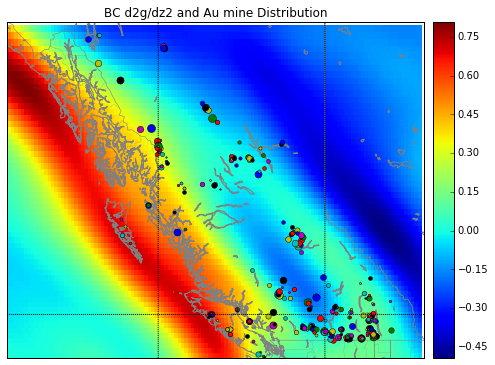

In [215]:
#plt.figure()
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='merc', resolution='h', area_thresh=1.0, llcrnrlon=BC_long_min, llcrnrlat=BC_lat_min, urcrnrlon=BC_long_max, urcrnrlat=BC_lat_max)
# Transform from lat/lon to projection coordinates
transformed_x, transformed_y = m(xx, yy)

min_marker_size=1.0
for lon, lat, mag in zip(lons, lats, Au_prod):
    x,y = m(lon, lat)
    #msize = math.log10(mag)*(min_marker_size)
    msize = np.log10(mag)*(min_marker_size)
    m.plot(x, y, 'o', markersize=msize)
    #m.plot(x, y, 'ro', markersize=msize)
    
#OLD WORKS# m.pcolormesh(transformed_x, transformed_y, g_grad_XX_only_array)
m.pcolormesh(transformed_x, transformed_y, d2_g_ZZ_by_dZ2_only_reshaped)
m.colorbar()
# Other cartography features
plt.title('BC d2g/dz2 and Au mine Distribution')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='gray')
m.drawmapboundary()
m.drawmeridians(np.arange(0, 360, 10))
m.drawparallels(np.arange(-90, 90, 10))

plt.show()

In [ ]:
#### Find the nearest latitude and longitude for Darwin
####lat_idx = np.abs(lats - darwin['lat']).argmin()
####lon_idx = np.abs(lons - darwin['lon']).argmin()

In [ ]:
lat_idx = np.abs(g_grad_df['Latitude'] - darwin['lat']).sort()

In [1]:
!python --version

Python 3.7.0
